In [56]:
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

x = cancer.data
y = cancer.target


from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

['mean perimeter' 'mean area']


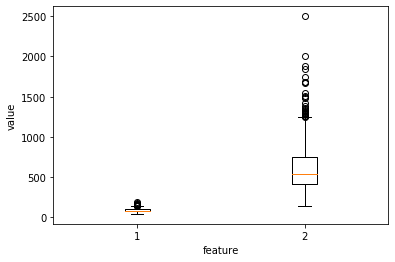

In [62]:
print(cancer.feature_names[[2, 3]])
import matplotlib.pyplot as plt
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

We can observe there is a big difference in scale between two different features.

Let's see how model accuracy changes before and after adjusting the scale.

In [103]:
class LogisticNeuron:
    
    def __init__(self, learning_rate = 0.1):
        self.w = None;
        self.b = None;
        self.losses = []
        self.w_history = []
        self.lr = learning_rate
            
            
            
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def activation(self, z):
        a = 1/(1+np.exp(-z))
        return a
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1]) 
        self.b = 0
        self.w_history.append(self.w.copy())
        for i in range(epochs):
            loss = 0;
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i] - a)
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= self.lr * w_grad
                self.b -= b_grad
                self.w_history.append(self.w.copy())
                a = np.clip(a, 1e-10, 1-1e-10) 
                loss = loss + (- (y[i]*np.log(a)+(1-y[i])*np.log(1-a)))
            self.losses.append(loss/len(y))
                
                
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a>0.5
    
    def score(self, x, y):
        return np.mean(self.predict(x)==y)


In [117]:
# Accuracy without adjusting scale.

neuron = LogisticNeuron()
neuron.fit(x_train, y_train)
neuron.score(x_val, y_val)

0.7912087912087912

Text(0, 0.5, 'w[3]')

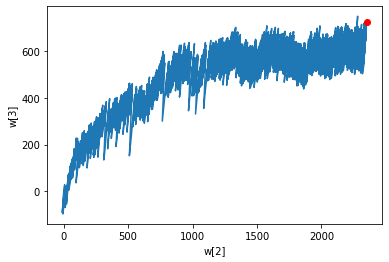

In [118]:
w2=[]
w3=[]
for w in neuron.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')

One of scaling method.

z = (x - mean)/(standard deviation)    which is called 'standardization'

In [121]:
train_mean = np.mean(x_train, axis =0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

val_mean = np.mean(x_val, axis =0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std

0.967032967032967


Text(0, 0.5, 'w[3]')

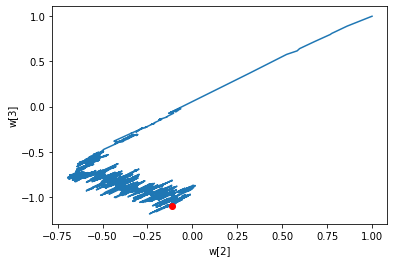

In [128]:
# Accuracy after adjusting scale.

neuron2 = LogisticNeuron()
neuron2.fit(x_train_scaled, y_train)
print(neuron2.score(x_val_scaled, y_val))

w2=[]
w3=[]
for w in neuron2.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')

After scaling, weight is converging more simply with less fluctuation.
Moreover, it has higher accuracy.

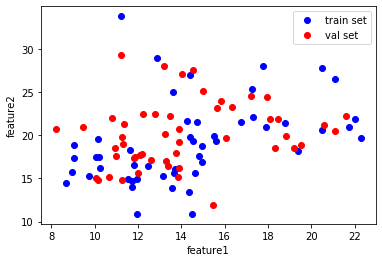

In [129]:
plt.plot(x_train[:50, 0], x_train[:50, 1], 'bo')
plt.plot(x_val[:50, 0], x_val[:50, 1], 'ro')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend(['train set', 'val set'])
plt.show()

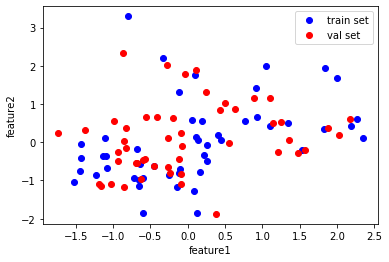

In [132]:
plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend(['train set', 'val set'])
plt.show()

<img src="이미지/스케일링1.png" align = 'left' width="400" height="300">
<img src="이미지/스케일링2.png" align = 'left' width="400" height="300">
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
In the graph, we can see that the relationship between features is different between before scaling and after scaling.
However, it should not be different.

So, when you scale the validation set, you should use the same mean and standard deviation as the training set.

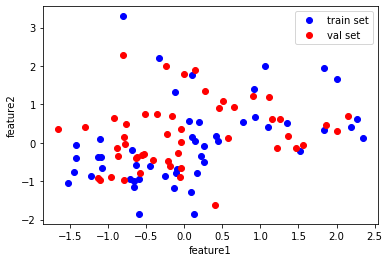

In [134]:
x_val_scaled = (x_val - train_mean) / train_std

plt.plot(x_train_scaled[:50, 0], x_train_scaled[:50, 1], 'bo')
plt.plot(x_val_scaled[:50, 0], x_val_scaled[:50, 1], 'ro')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend(['train set', 'val set'])
plt.show()

In [143]:
# Accuracy after adjusting scale.
print(neuron2.score(x_val_scaled, y_val))

0.967032967032967


Accuracy is the same as before rescaling valiadation data because we did not use enough bigger data to see differences.